In [1]:
import torch
import os
import numpy as np
import csv
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import cv2

import librosa
import librosa.display
import matplotlib
matplotlib.use('TKAgg')
import matplotlib.pyplot as plt

import librosa
import librosa.display

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

from IPython.display import Audio

%matplotlib inline


In [2]:
normal_audio_path = r'D:\交大\碩一下\深度學習\Final project\data\test\slider\id_00\normal\00000001.wav'
abnormal_audio_path  = r'D:\交大\碩一下\深度學習\Final project\data\test\slider\id_00\abnormal\00000001.wav'


In [3]:
y1 , sr1 = librosa.load(normal_audio_path, sr=16000)
y2 , sr2 = librosa.load(abnormal_audio_path, sr=16000)


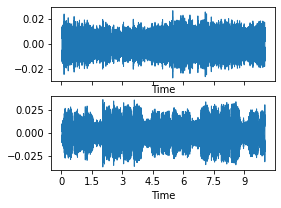

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(4, 3))

librosa.display.waveshow(y1, sr=sr1, ax=ax[0])
librosa.display.waveshow(y2, sr=sr2, ax=ax[1])


In [5]:
M1 = librosa.feature.melspectrogram(y=y1, sr=sr1, n_mels=64, n_fft=1024, hop_length=512)
M2 = librosa.feature.melspectrogram(y=y2, sr=sr2, n_mels=64, n_fft=1024, hop_length=512)
M_db1 = librosa.power_to_db(M1, ref=np.max)
M_db2 = librosa.power_to_db(M2, ref=np.max)


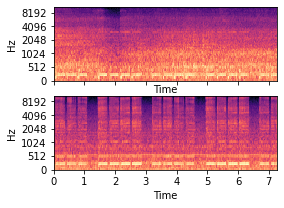

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(4, 3))

librosa.display.specshow(M_db1, x_axis='time', y_axis='mel', ax=ax[0])
# ax[0].set(title='Normal')
librosa.display.specshow(M_db2, x_axis='time', y_axis='mel', ax=ax[1])
# ax[1].set(title='Abnormal')
# plt.tight_layout()

In [9]:
def scale_minmax(X, min=0.0, max=1.0):
    """
    Minmax scaler for a numpy array
    
    PARAMS
    ======
        X (numpy array) - array to scale
        min (float) - minimum value of the scaling range (default: 0.0)
        max (float) - maximum value of the scaling range (default: 1.0)
    """
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

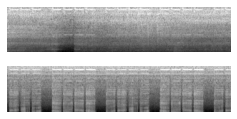

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(4, 2))
img1 = scale_minmax(M_db1, 0, 255).astype(np.uint8)
ax[0].imshow(img1, cmap='gray')
ax[0].axis('off')
img2 = scale_minmax(M_db2, 0, 255).astype(np.uint8)
ax[1].imshow(img2, cmap='gray')
ax[1].axis('off')
plt.show()

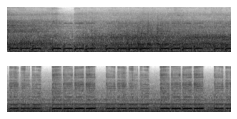

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(4, 2))
img11 = 255 - np.flip(img1, axis=0)
ax[0].imshow(img11, cmap='gray')
ax[0].axis('off')
img22 = 255 - np.flip(img2, axis=0)
ax[1].imshow(img22, cmap='gray')
ax[1].axis('off')
plt.show()